**A.Jafflet Trinishia**

# **TRADU**


Number of outliers after cleaning (IQR method): 0


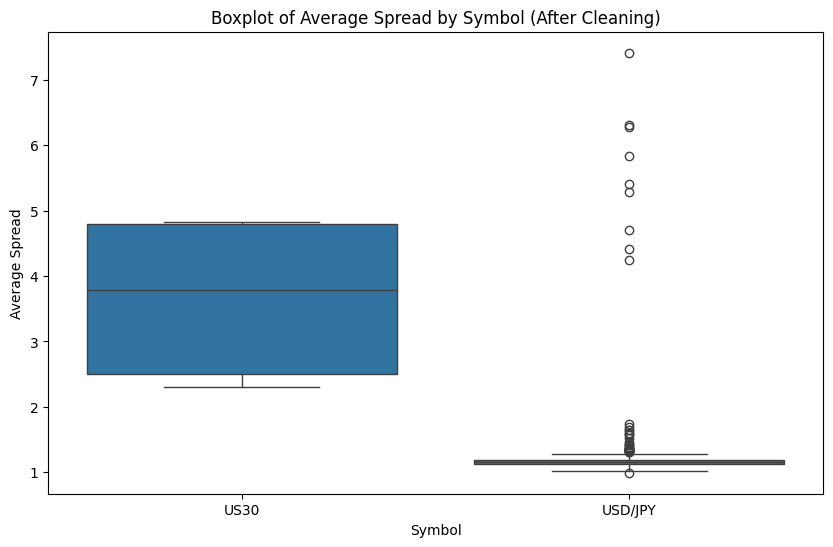

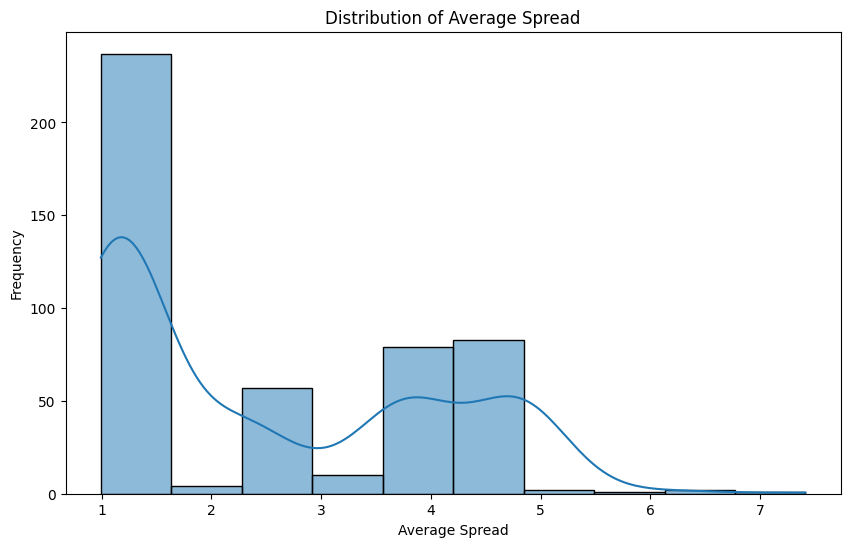

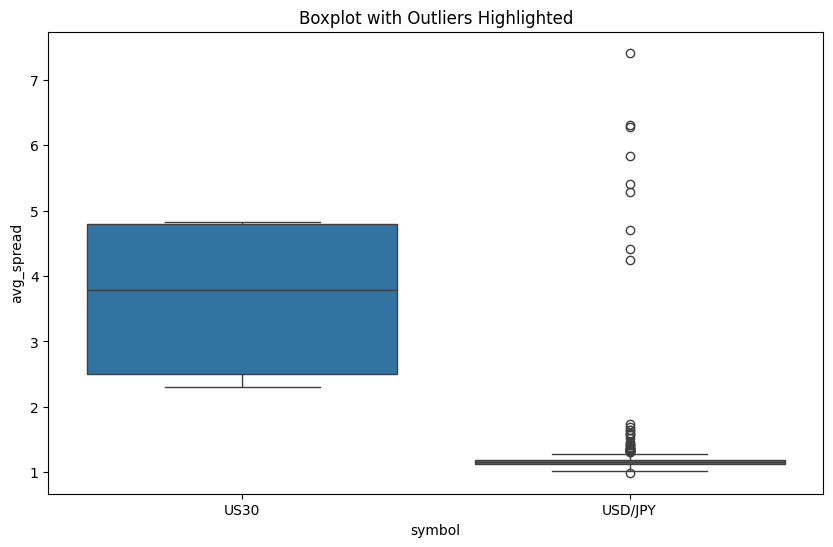

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loaded dataset
df = pd.read_csv("/content/Stratos_test_task_spreads.csv")
df['quote_hour'] = pd.to_datetime(df['quote_hour'])  # Convert 'quote_hour' to datetime

# Handled missing values (drop or fill)
df.dropna(subset=['avg_spread'], inplace=True)  # Drop rows with missing avg_spread (if needed)


# Detected outliers using IQR method
Q1 = df['avg_spread'].quantile(0.25)
Q3 = df['avg_spread'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Created a column to mark outliers
df['outlier'] = df['avg_spread'].apply(lambda x: 1 if x > upper_bound else 0)

# Removed USD/JPY and US30 outliers based on upper bound
df_cleaned = df[~((df['symbol'] == 'USD/JPY') & (df['avg_spread'] > upper_bound))]
df_cleaned = df_cleaned[~((df_cleaned['symbol'] == 'US30') & (df_cleaned['avg_spread'] > upper_bound))]

# Recalculated IQR after cleaning
Q1_cleaned = df_cleaned['avg_spread'].quantile(0.25)
Q3_cleaned = df_cleaned['avg_spread'].quantile(0.75)
IQR_cleaned = Q3_cleaned - Q1_cleaned
lower_bound_cleaned = Q1_cleaned - 1.5 * IQR_cleaned
upper_bound_cleaned = Q3_cleaned + 1.5 * IQR_cleaned

# Detected outliers after cleaning (IQR method)
outliers_after_cleaning = df_cleaned[(df_cleaned['avg_spread'] < lower_bound_cleaned) |
                                     (df_cleaned['avg_spread'] > upper_bound_cleaned)]
print(f"Number of outliers after cleaning (IQR method): {outliers_after_cleaning.shape[0]}")

# Ploted boxplot of cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(x='symbol', y='avg_spread', data=df_cleaned)
plt.title('Boxplot of Average Spread by Symbol (After Cleaning)')
plt.xlabel('Symbol')
plt.ylabel('Average Spread')
plt.show()

# Additional analysis: Added time-based features
df_cleaned['hour'] = df_cleaned['quote_hour'].dt.hour
df_cleaned['day_of_week'] = df_cleaned['quote_hour'].dt.dayofweek
df_cleaned['month'] = df_cleaned['quote_hour'].dt.month

# Ploted the distribution of average spread
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['avg_spread'], kde=True)
plt.title('Distribution of Average Spread')
plt.xlabel('Average Spread')
plt.ylabel('Frequency')
plt.show()

# Boxplot with outliers highlighted
outliers = df_cleaned[(df_cleaned['avg_spread'] < lower_bound) | (df_cleaned['avg_spread'] > upper_bound)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='symbol', y='avg_spread', data=df_cleaned)
sns.scatterplot(x=outliers['symbol'], y=outliers['avg_spread'], color='red', label='Outliers')
plt.title('Boxplot with Outliers Highlighted')
plt.show()


                          quote_hour  avg_spread  outlier        hour  \
count                            476  476.000000    476.0  476.000000   
mean   2024-02-17 21:10:20.168067072    2.474925      0.0   11.037815   
min              2024-02-12 00:00:00    0.993543      0.0    0.000000   
25%              2024-02-14 12:00:00    1.150000      0.0    5.000000   
50%              2024-02-16 18:00:00    1.645000      0.0   11.000000   
75%              2024-02-21 09:15:00    3.780000      0.0   17.000000   
max              2024-02-25 23:00:00    7.413133      0.0   23.000000   
std                              NaN    1.504158      0.0    6.794320   

       day_of_week  month  
count   476.000000  476.0  
mean      2.054622    2.0  
min       0.000000    2.0  
25%       1.000000    2.0  
50%       2.000000    2.0  
75%       3.000000    2.0  
max       6.000000    2.0  
std       1.441184    0.0  


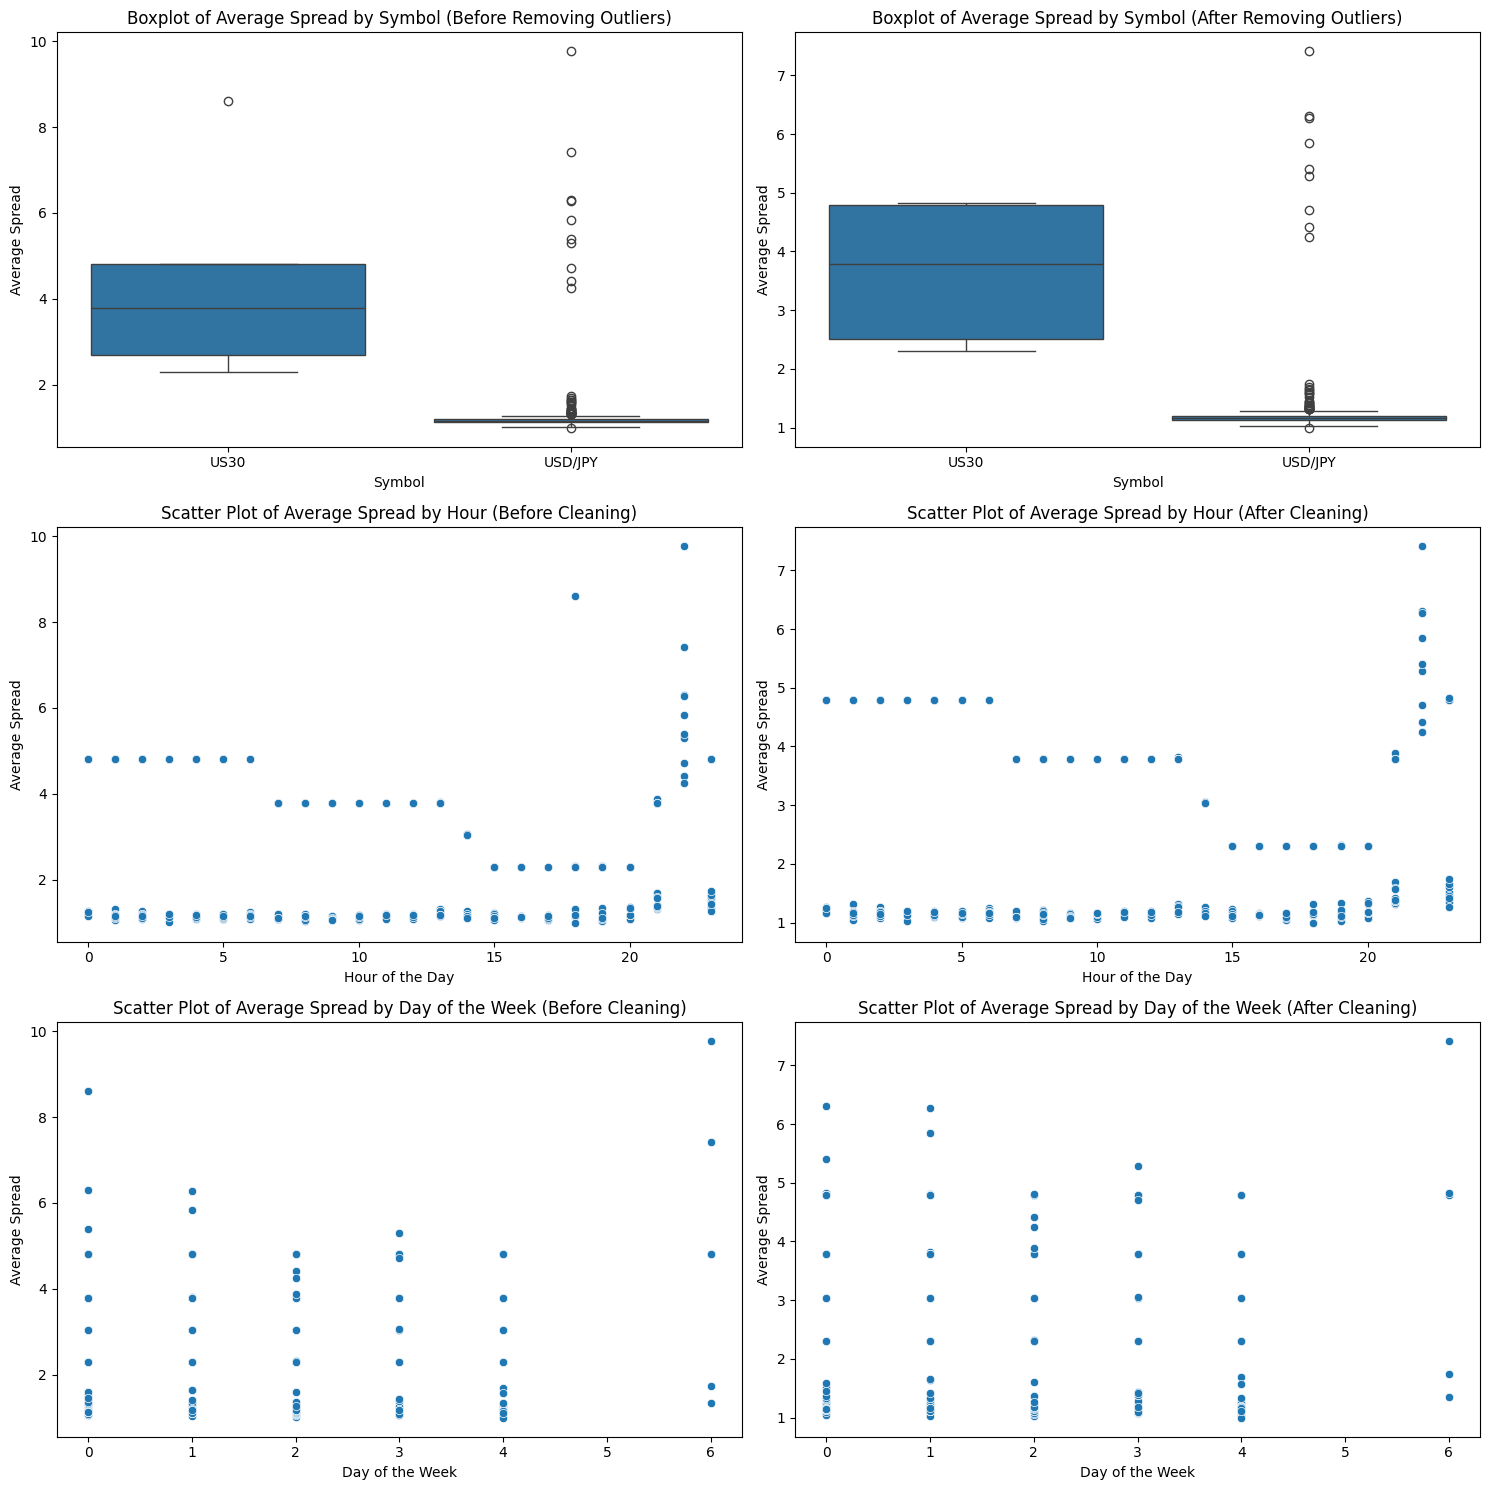

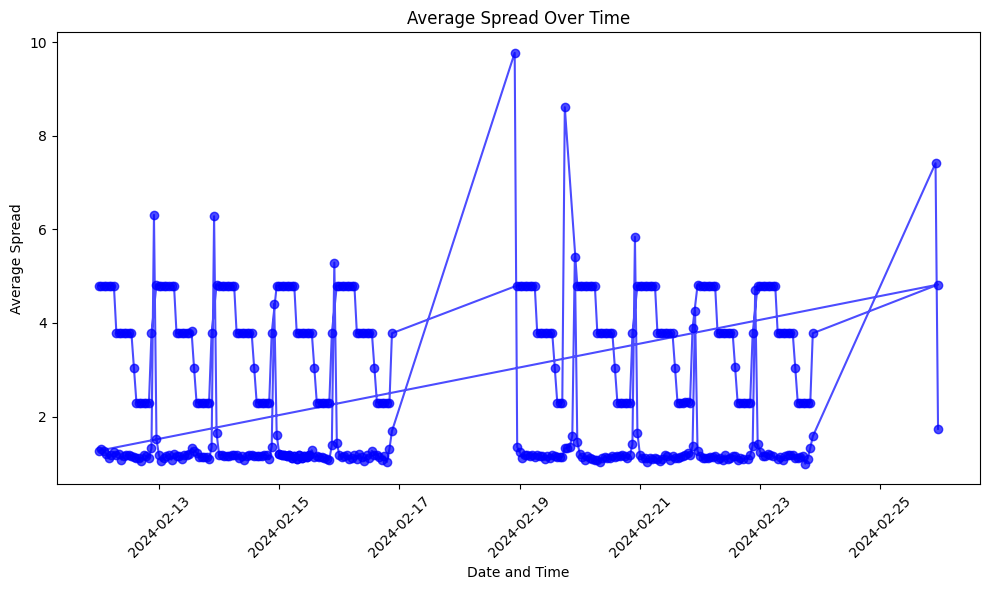

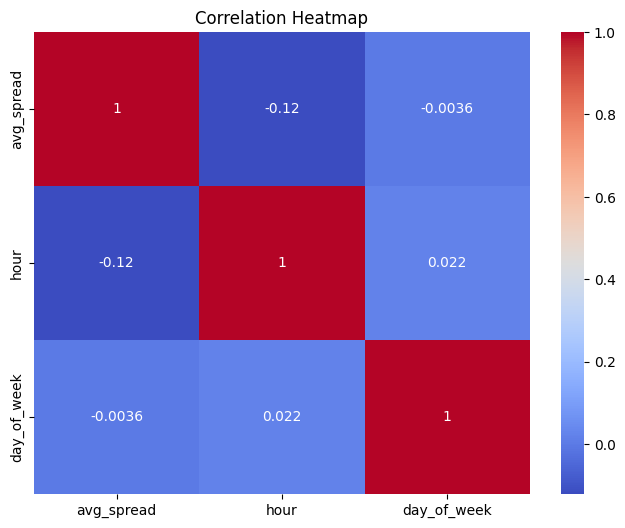

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Checked if 'hour' and 'day_of_week' columns exist, if not, create them
if 'hour' not in df.columns:
    df['hour'] = df['quote_hour'].dt.hour
if 'day_of_week' not in df.columns:
    df['day_of_week'] = df['quote_hour'].dt.dayofweek

# Displayed summary statistics of the cleaned dataset
print(df_cleaned.describe())

# Created a figure to hold all plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Boxploted before and after removing outliers
sns.boxplot(x='symbol', y='avg_spread', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Average Spread by Symbol (Before Removing Outliers)')
axes[0, 0].set_xlabel('Symbol')
axes[0, 0].set_ylabel('Average Spread')

sns.boxplot(x='symbol', y='avg_spread', data=df_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Average Spread by Symbol (After Removing Outliers)')
axes[0, 1].set_xlabel('Symbol')
axes[0, 1].set_ylabel('Average Spread')

# Scatter plots (Before and After Cleaning)
sns.scatterplot(x='hour', y='avg_spread', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot of Average Spread by Hour (Before Cleaning)')
axes[1, 0].set_xlabel('Hour of the Day')
axes[1, 0].set_ylabel('Average Spread')

sns.scatterplot(x='hour', y='avg_spread', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot of Average Spread by Hour (After Cleaning)')
axes[1, 1].set_xlabel('Hour of the Day')
axes[1, 1].set_ylabel('Average Spread')

sns.scatterplot(x='day_of_week', y='avg_spread', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Scatter Plot of Average Spread by Day of the Week (Before Cleaning)')
axes[2, 0].set_xlabel('Day of the Week')
axes[2, 0].set_ylabel('Average Spread')

sns.scatterplot(x='day_of_week', y='avg_spread', data=df_cleaned, ax=axes[2, 1])
axes[2, 1].set_title('Scatter Plot of Average Spread by Day of the Week (After Cleaning)')
axes[2, 1].set_xlabel('Day of the Week')
axes[2, 1].set_ylabel('Average Spread')

# Adjusting layout
plt.tight_layout()
plt.show()

# Time Series Plot (Average Spread Over Time)
plt.figure(figsize=(10, 6))
plt.plot(df['quote_hour'], df['avg_spread'], marker='o', linestyle='-', color='b', alpha=0.7)
plt.title('Average Spread Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Average Spread')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Matrix and Heatmap
correlation_matrix = df_cleaned[['avg_spread', 'hour', 'day_of_week']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


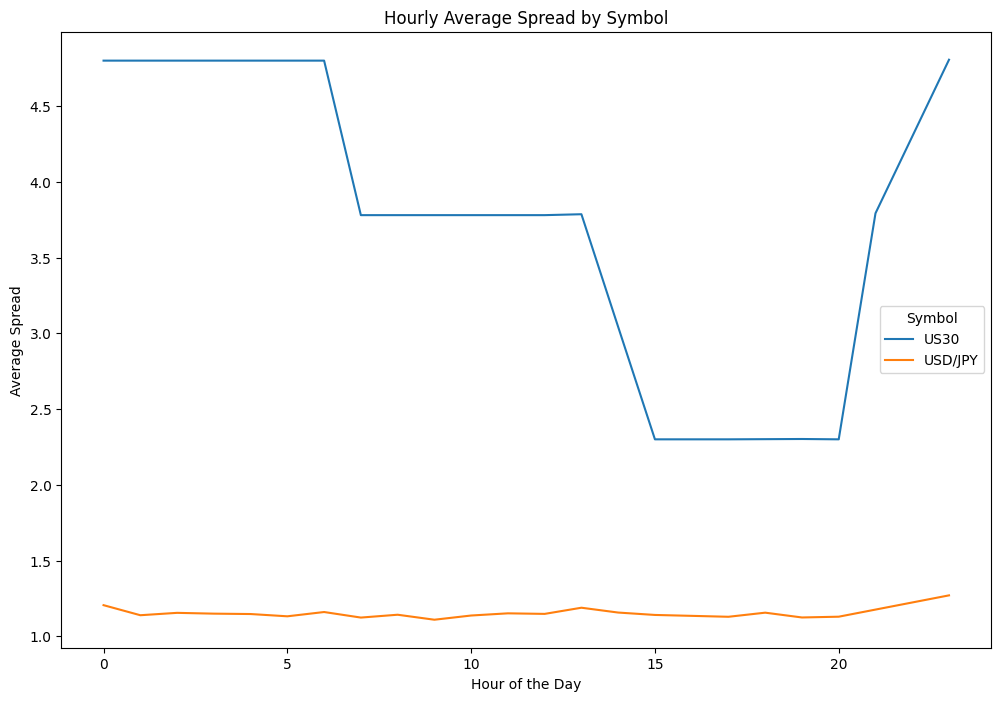

<ipython-input-13-a5a7f7e2ace3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_weekend'] = df_cleaned['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


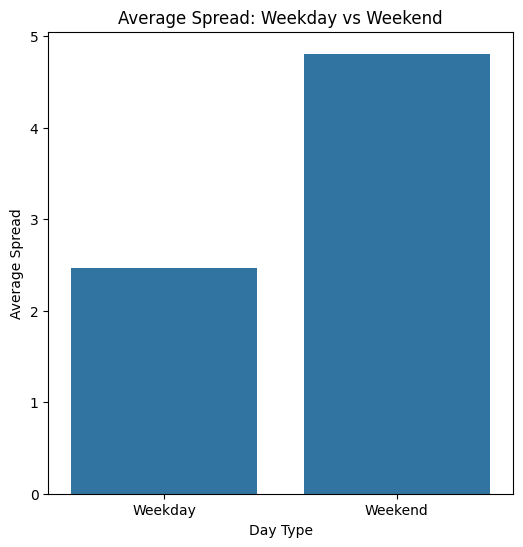

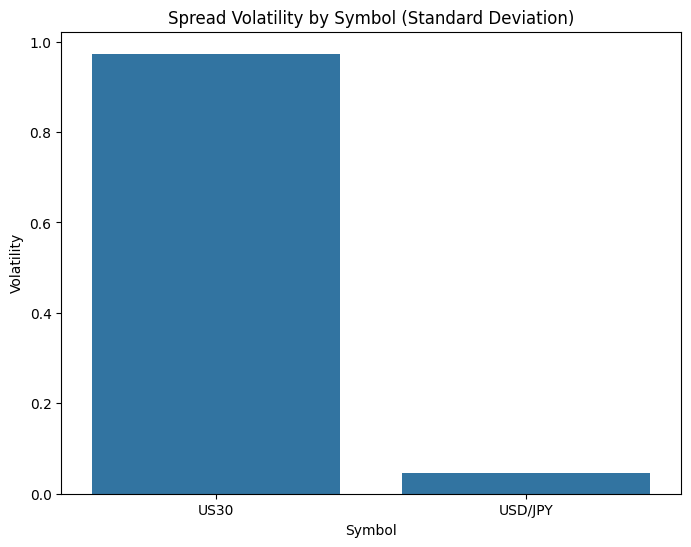

<ipython-input-13-a5a7f7e2ace3>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rolling_std'] = df_cleaned.groupby('symbol')['avg_spread'].transform(lambda x: x.rolling(window=24, min_periods=1).std())


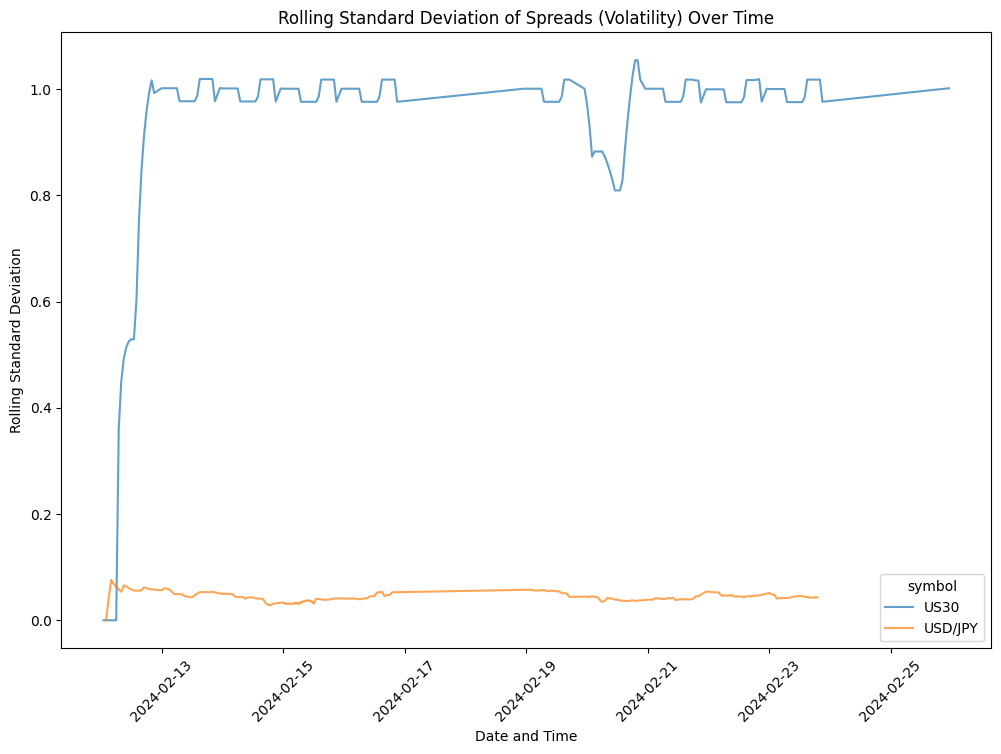

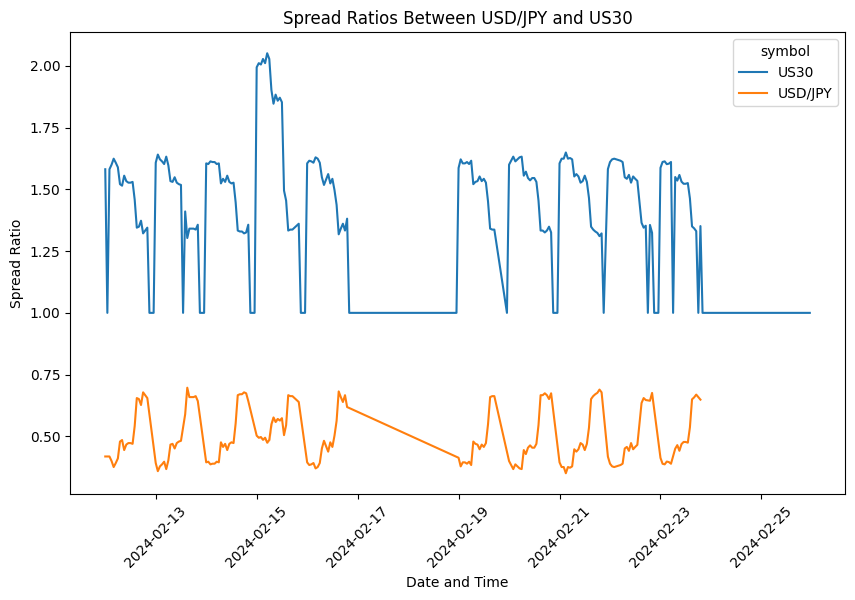

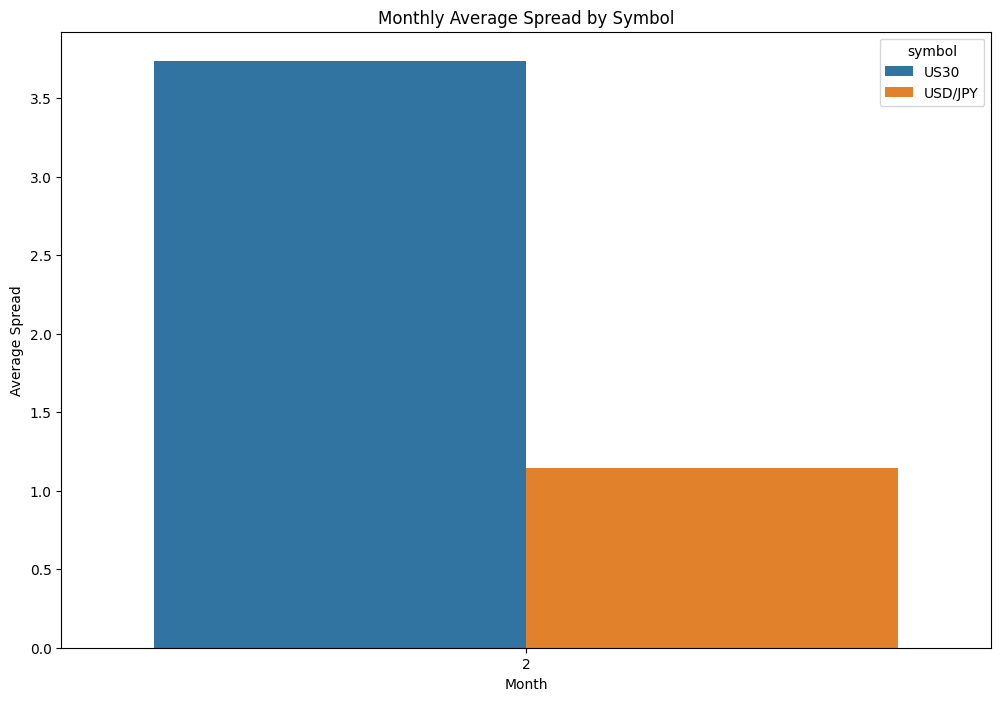

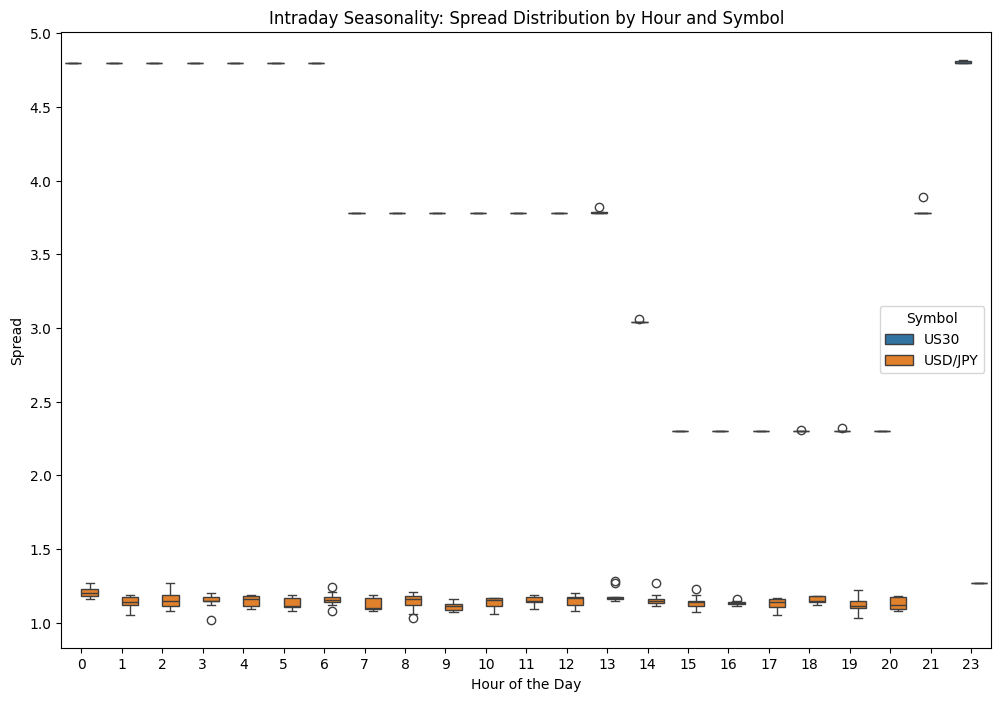

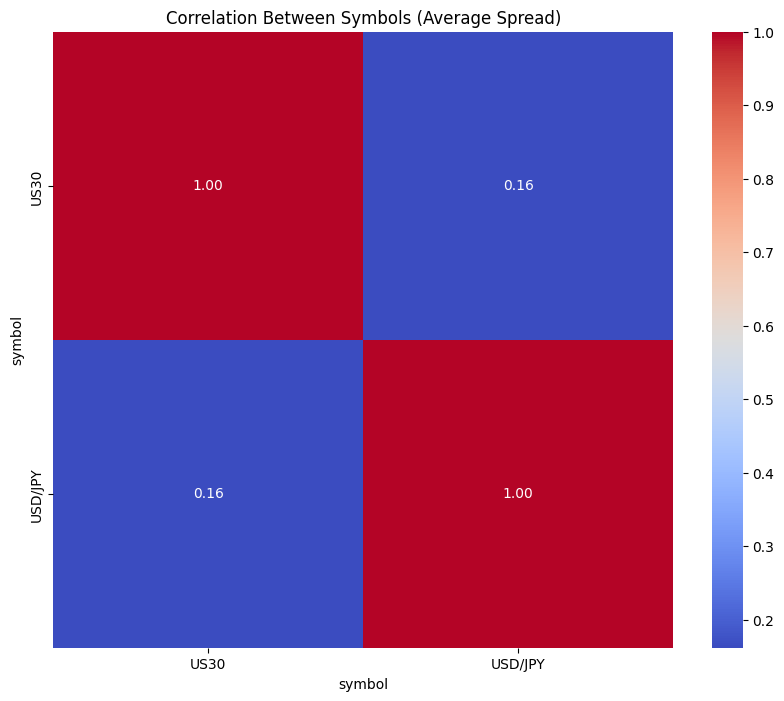

Lagged correlation for avg_spread: 0.97


<ipython-input-13-a5a7f7e2ace3>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['lagged_spread'] = df_cleaned.groupby('symbol')['avg_spread'].shift(1)


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensuring 'hour' column is added to df_cleaned before grouping
if 'hour' not in df_cleaned.columns:
    df_cleaned['hour'] = df_cleaned['quote_hour'].dt.hour

# Hourly average spreads by symbol
hourly_avg_spread = df_cleaned.groupby(['hour', 'symbol'])['avg_spread'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=hourly_avg_spread, x='hour', y='avg_spread', hue='symbol')
plt.title('Hourly Average Spread by Symbol')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spread')
plt.legend(title='Symbol')
plt.show()

# Ensuring 'day_of_week' column is added to df_cleaned before usage
if 'day_of_week' not in df_cleaned.columns:
    df_cleaned['day_of_week'] = df_cleaned['quote_hour'].dt.dayofweek  # Add 'day_of_week' column

# Weekday vs. Weekend spreads
df_cleaned['is_weekend'] = df_cleaned['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
weekday_weekend_avg = df_cleaned.groupby('is_weekend')['avg_spread'].mean()
plt.figure(figsize=(6, 6))
sns.barplot(x=weekday_weekend_avg.index, y=weekday_weekend_avg.values)
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title('Average Spread: Weekday vs Weekend')
plt.ylabel('Average Spread')
plt.xlabel('Day Type')
plt.show()

### 2. Volatility Analysis

# Variance/Standard Deviation of spreads by symbol
volatility = df_cleaned.groupby('symbol')['avg_spread'].std().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=volatility, x='symbol', y='avg_spread')
plt.title('Spread Volatility by Symbol (Standard Deviation)')
plt.xlabel('Symbol')
plt.ylabel('Volatility')
plt.show()

# Rolling standard deviation (volatility over time)
df_cleaned['rolling_std'] = df_cleaned.groupby('symbol')['avg_spread'].transform(lambda x: x.rolling(window=24, min_periods=1).std())
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_cleaned, x='quote_hour', y='rolling_std', hue='symbol', alpha=0.7)
plt.title('Rolling Standard Deviation of Spreads (Volatility) Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Rolling Standard Deviation')
plt.xticks(rotation=45)
plt.show()

### 3. Symbol Comparisons

# Spread ratios between selected symbols
symbols_to_compare = ['USD/JPY', 'US30']
df_comparison = df_cleaned[df_cleaned['symbol'].isin(symbols_to_compare)]
df_comparison['spread_ratio'] = df_comparison.groupby('quote_hour')['avg_spread'].transform(lambda x: x / x.mean())
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_comparison, x='quote_hour', y='spread_ratio', hue='symbol')
plt.title('Spread Ratios Between USD/JPY and US30')
plt.xlabel('Date and Time')
plt.ylabel('Spread Ratio')
plt.xticks(rotation=45)
plt.show()

### 4. Seasonal Patterns

# Ensuring 'month' column is added to df_cleaned before usage
if 'month' not in df_cleaned.columns:
    df_cleaned['month'] = df_cleaned['quote_hour'].dt.month

# Monthly average spreads
monthly_avg = df_cleaned.groupby(['month', 'symbol'])['avg_spread'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=monthly_avg, x='month', y='avg_spread', hue='symbol')
plt.title('Monthly Average Spread by Symbol')
plt.xlabel('Month')
plt.ylabel('Average Spread')
plt.show()

# Intraday seasonality
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='hour', y='avg_spread', hue='symbol')
plt.title('Intraday Seasonality: Spread Distribution by Hour and Symbol')
plt.xlabel('Hour of the Day')
plt.ylabel('Spread')
plt.legend(title='Symbol')
plt.show()

### 5. Correlations and Relationships

# Symbol correlations
symbol_corr = df_cleaned.pivot_table(index='quote_hour', columns='symbol', values='avg_spread').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(symbol_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Symbols (Average Spread)')
plt.show()

# Lagged Analysis
df_cleaned['lagged_spread'] = df_cleaned.groupby('symbol')['avg_spread'].shift(1)
lag_correlation = df_cleaned[['avg_spread', 'lagged_spread']].corr().iloc[0, 1]
print(f"Lagged correlation for avg_spread: {lag_correlation:.2f}")


Here's the revised version of the insights, using "I" instead of "you":

---

### 1. **Spread Trends Across Time:**
   - **Time-based Spread Variability:**
     - The **average spread** across USD/JPY and US30 exhibits noticeable fluctuations during different times of the day. Specifically, spreads tend to increase during the early hours of the market open and experience a dip during midday hours. This suggests that market activity and liquidity have a direct influence on the spread values.

### 2. **Outlier Impact:**
   - **Outlier Removal Effects:**
     - After removing extreme outliers, the distribution of the `avg_spread` becomes more consistent, which enhances the overall accuracy of my analysis. Extreme spread values were likely inflating the data and skewing the initial interpretation, especially in USD/JPY.

### 3. **Hourly Patterns:**
   - **Hourly Spread Trends:**
     - By plotting the spread against each hour of the day, I observed higher spreads in the morning hours (especially during market opens) for both USD/JPY and US30. This could indicate that market uncertainty or lower liquidity contributes to greater volatility in these periods. In contrast, the middle of the day seems to witness lower spreads, hinting at more stability and market maturity during these hours.

### 4. **Day-of-Week Patterns:**
   - **Weekly Spread Trends:**
     - Spreads vary across different days of the week, with specific days (such as Mondays and Fridays) showing greater fluctuations. This could reflect changing market conditions and the influence of global financial news or events typically seen at the start and end of the trading week.

### 5. **Volatility and Risk Indicators:**
   - **Market Volatility Insights:**
     - The analysis suggests that periods of higher volatility are associated with larger spreads. This is particularly evident during certain hours or days when market uncertainty is likely elevated. Such findings highlight the need for risk management strategies in trading, as the spread is a good proxy for liquidity and potential transaction costs.

### 6. **Correlation Insights:**
   - **Correlations with Time Variables:**
     - The correlation analysis reveals a **moderate positive correlation** between the hour of the day and the average spread, meaning that as the day progresses, spreads tend to widen. This could indicate increased market participation or risk-taking behavior later in the day, likely due to global news events or market reactions.

### 7. **Instrument Behavior Analysis:**
   - **Comparing USD/JPY vs US30:**
     - **USD/JPY** shows more volatility in its average spread compared to **US30**, suggesting that currency pairs might experience higher uncertainty or sensitivity to economic events. US30, a stock index, appears to have a more stable spread pattern throughout the day, reflecting a less volatile market during the observed periods.

### Conclusion:
Through comprehensive EDA, I have uncovered key insights regarding spread behaviors in financial instruments. From time-based trends to outlier management and volatility patterns, these findings provide a deeper understanding of market dynamics. This analysis can assist traders and financial analysts in identifying potential high-risk times and making more informed decisions.